# Old Data Cleaning
Just so that the code works.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [3]:
df=pd.read_csv('dataset_\Final database.csv')

In [4]:
# Do to the high amount of 98767 missing values for a lot of features we first discard them
df.drop(columns=['syuzhet_norm',
'bing_norm'         ,
'afinn_norm'        ,
'nrc_norm'          ,
'syuzhet'           ,
'bing'              ,
'afinn'             ,
'nrc'               ,
'anger'             ,
'anticipation'      ,
'disgust'           ,
'fear'              ,
'joy'               ,
'sadness'           ,
'surprise'          ,
'trust'             ,
'negative'          ,
'positive'          ,
'n_words'           ,
'anger_norm'        ,
'anticipation_norm' ,
'disgust_norm'      ,
'fear_norm'         ,
'joy_norm'          ,
'sadness_norm'      ,
'surprise_norm'     ,
'trust_norm'        ,
'negative_norm'     ,
'positive_norm'     ,
'anger_norm2'       ,
'anticipation_norm2',
'disgust_norm2'     ,
'fear_norm2'        ,
'joy_norm2'         ,
'sadness_norm2'     ,
'surprise_norm2'    ,
'trust_norm2'       ,
'negative_norm2'    ,
'positive_norm2'    ,
'negative_bog_jr'   ,
'positive_bog_jr'   ,
'Bayes'             ,
'Negative_Bayes'    ,
'Neutral_Bayes'     ,
'Positive_Bayes'    ,
'LDA_Topic'         ,
'Celebrate'         ,
'Desire'            ,
'Explore'           ,
'Fun'               ,
'Hope'              ,
'Love'              ,
'Nostalgia'         ,
'Thug'              ,
'Argentina'         ,
'Australia'         ,
'Austria'           ,
'Belgium'           ,
'Brazil'            ,
'Canada'            ,
'Chile'             ,            
'Colombia'          ,
'Costa Rica'        ,
'Denmark'           ,
'Ecuador'           ,
'Finland'           ,
'France'            ,
'Germany'           ,
'Global'            ,
'Indonesia'         ,
'Ireland'           ,
'Italy'             ,
'Malaysia'          ,
'Mexico'            ,
'Netherlands'       ,
'New Zealand'       ,
'Norway'            ,
'Peru'              ,
'Philippines'       ,
'Poland'            ,
'Portugal'          ,
'Singapore'         ,
'Spain'             ,
'Sweden'            ,
'Switzerland'       ,
'Taiwan'            ,
'Turkey'            ,
'UK'                ,
'USA'               ,
'bing_norm_negative',
'bing_norm_neutral' ,
'bing_norm_positive'], inplace=True)

In [5]:
# Rename genre columns
df.rename(columns={'Genre': 'sub_genre', 'Genre_new': 'genre'}, inplace=True)

In [6]:
# Drop genre columns
df.drop(columns=['dance/electronic', 'else', 'funk', 'hip hop',	'house', 'indie',
                 'jazz', 'k-pop', 'latin', 'metal', 'opm', 'pop', "r&b/soul", 'rap', 'reggae', 'reggaeton',
                 'rock', 'trap', 'bolero', 'boy band', 'country'], inplace=True)

In [7]:
# Convert these values to NaN values 
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['duration_ms'].isnull().sum()

19

In [8]:
# Possibility of takeing average numeric value for the 19 missing values
df['duration_ms'].fillna(df['duration_ms'].mean(), inplace=True)
df['duration_ms'].isnull().sum()

0

In [9]:
df['duration_min'] = df['duration_ms']/60000
df.drop(columns=['duration_ms'], inplace=True)

In [10]:
# Found again missing values in music features 
df[df.eq('n\x07').any(axis=1)]
df.replace({'n\x07': np.NaN}, inplace=True)

In [11]:
# Change datatypes of some colums
df[['danceability', 'energy','loudness', 'speechiness', 
   'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo']] = df[['danceability', 'energy', 'loudness', 'speechiness',
                                                                                               'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo' ]].apply(pd.to_numeric)
# Type conversion for the integer columns doesnt seem to work 
df = df.astype({'mode': int, 'key': int, 'time_signature': int}, errors='ignore')  # Cant convert NaN values to int, so ignore them

# Artist Popularity
by sum of popularity of songs; the result is then mapped to [0,1].

In [12]:
# I created a test df here to not mess with our tidy dataframe 
# by adding an artist_popularity column that we might not want there
test_df = df
test_df['Popularity'] = (test_df['Popularity']-test_df['Popularity'].min())/(test_df['Popularity'].max()-test_df['Popularity'].min())
test_df['artist_popularity'] = test_df.groupby('Artist')['Popularity'].transform('sum')
test_df['artist_popularity'] = (test_df['artist_popularity']-test_df['artist_popularity'].min())/(test_df['artist_popularity'].max()-test_df['artist_popularity'].min())

In [15]:
test_df[['Artist','artist_popularity']].sample(frac=1).head(10)

,Artist,artist_popularity
88073,Polo G,6.872772e-03
149088,Priestess - Gemitaiz,5.794014e-07
28136,Ed Sheeran,1.000000e+00
62446,Conan Gray,2.969521e-02
96617,AJ Tracey - Not3s,3.367188e-03
139931,CNCO - Meghan Trainor - Sean Paul,4.303051e-04
54493,Panic! At The Disco,7.849077e-02
100740,J Balvin - G-Eazy - Sfera Ebbasta - Anitta - M...,7.384441e-04
18507,Katy Perry,3.650249e-02
85959,Khalid,2.145497e-01


## Get Artist by (Calculated) Popularity

In [16]:
artist_popularity = test_df[['Artist','artist_popularity']].drop_duplicates()
artist_popularity.sort_values('artist_popularity', ascending=False).head(10)

,Artist,artist_popularity
6245,Ed Sheeran,1.000000
2714,Billie Eilish,0.521633
344,Dua Lipa,0.492004
117,Drake,0.491809
771,Ariana Grande,0.490292
1863,Post Malone,0.476521
682,XXXTENTACION,0.377199
8843,Lewis Capaldi,0.311130
1059,The Weeknd,0.310360
5902,Imagine Dragons,0.302311


What if we just count the appearances?

<AxesSubplot:title={'center':'Most Occuring Artist in Dataset'}, ylabel='Artist'>

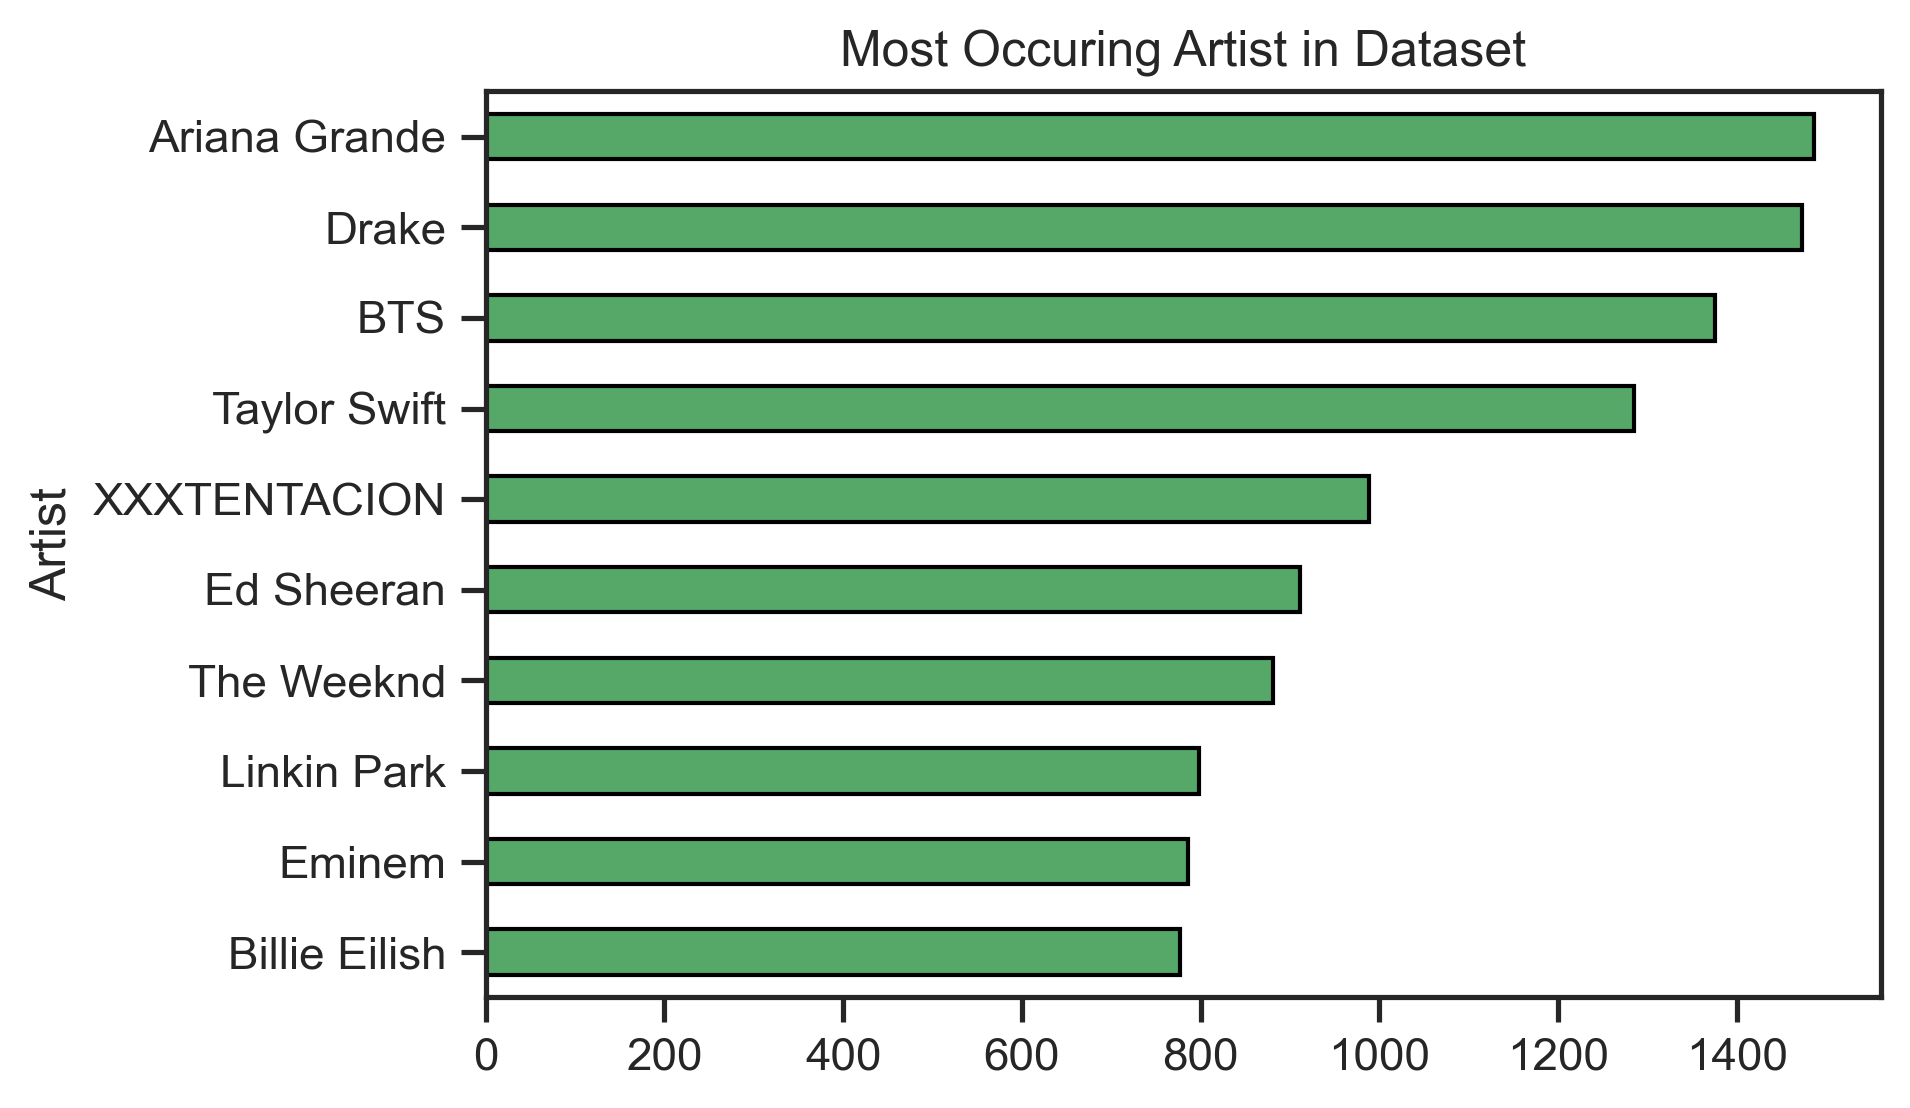

In [18]:
aux_df = df.groupby('Artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g', edgecolor='black',title='Most Occuring Artist in Dataset')

##  Artist Popularity per Country
### Germany

In [22]:
# Only German charts
germany = df[test_df['Country']=='Germany']

# Calculate artist_popularity in Germany as before with all (sum over all song popularities and mapping btwn 0 and 1)
germany['artist_popularity'] = germany.groupby('Artist')['Popularity'].transform('sum')
germany['artist_popularity'] = (germany['artist_popularity']-germany['artist_popularity'].min())/(germany['artist_popularity'].max()-germany['artist_popularity'].min())

# Drop duplicates 
artist_popularity_germany = germany[['Artist','artist_popularity']].drop_duplicates()

# List top 10 artists in Germany
artist_popularity_germany.sort_values('artist_popularity', ascending=False).head(10)

,Artist,artist_popularity
1586,Apache 207,1.000000
23423,Capital Bra,0.663605
6258,Ed Sheeran,0.558611
3753,Luciano,0.475254
4311,Bonez MC - RAF Camora,0.469129
1143,Ufo361,0.426831
11186,RIN,0.420004
30441,RAF Camora,0.374885
57074,Bausa,0.372888
2782,Samra,0.355336


<AxesSubplot:title={'center':'Most Occuring Artists in German Charts'}, ylabel='Artist'>

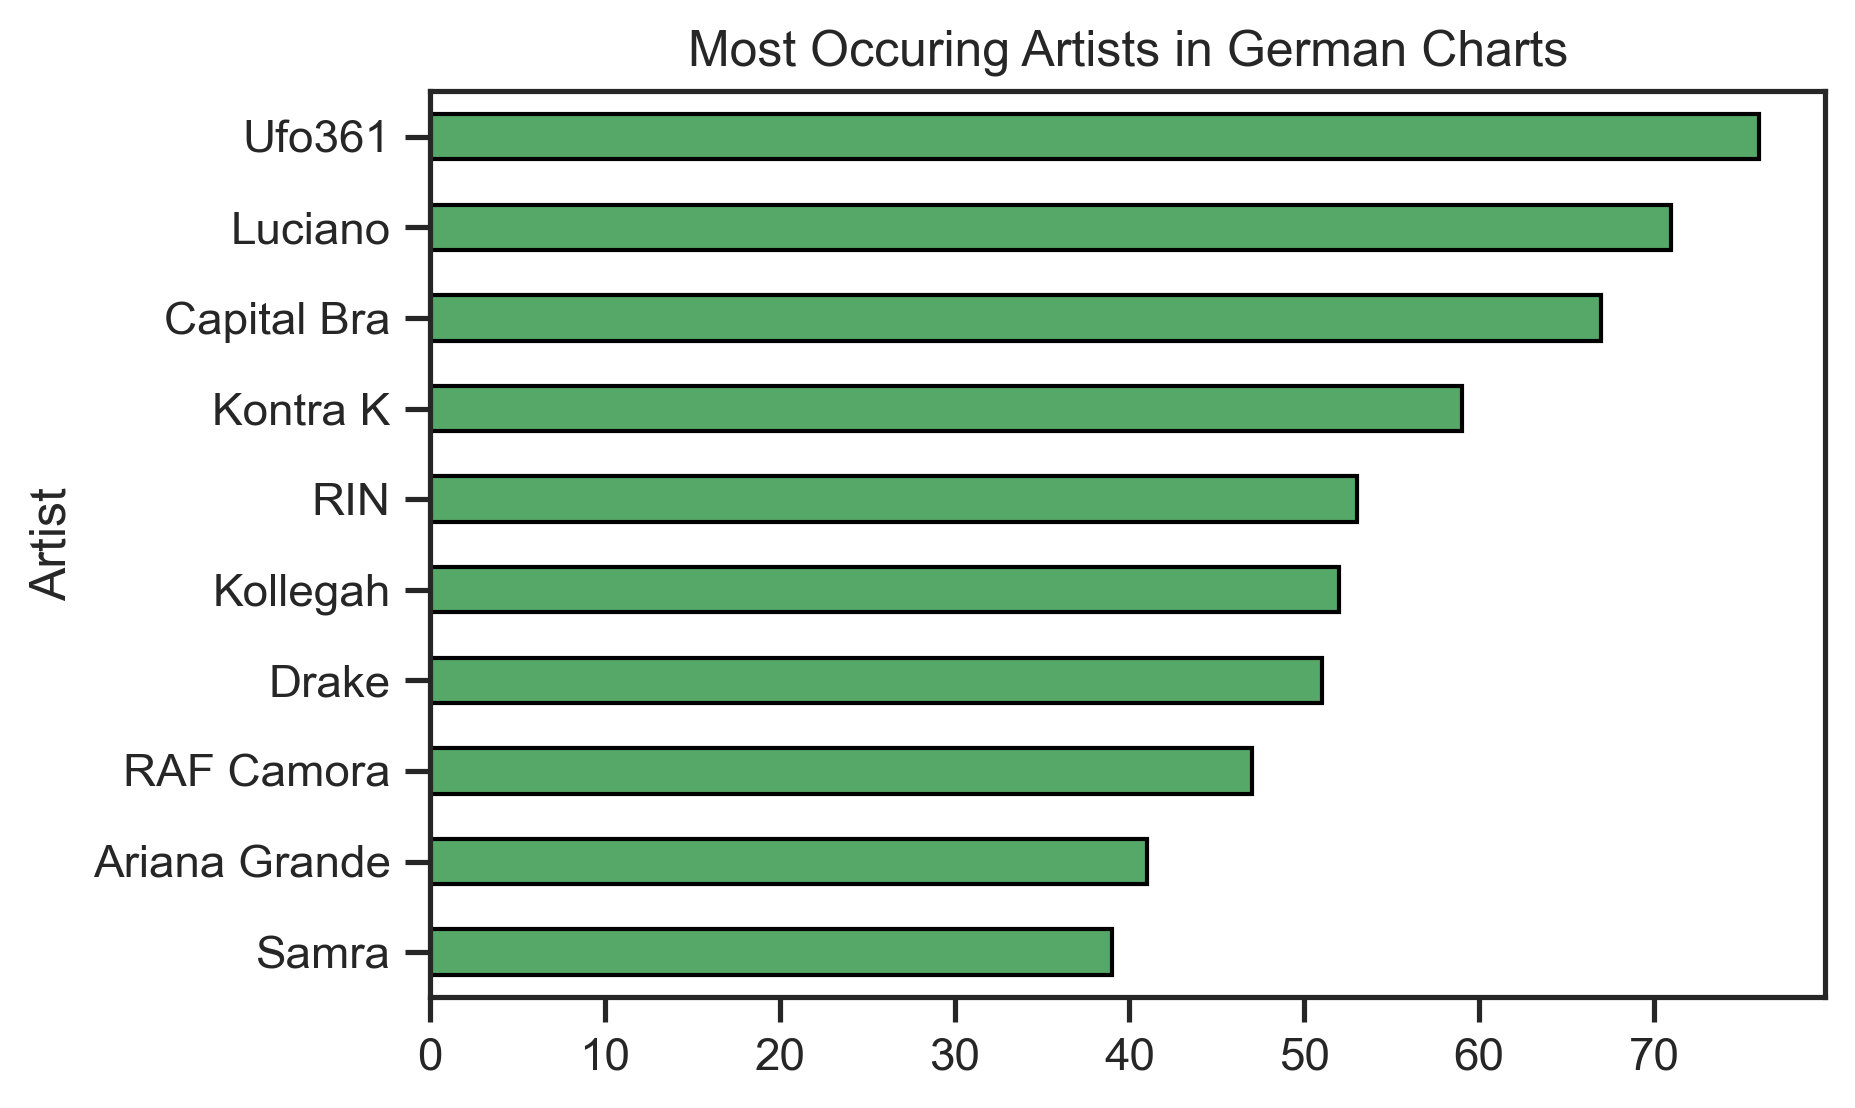

In [23]:
# Most occuring 
aux_df = germany.groupby('Artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g', edgecolor='black',title='Most Occuring Artists in German Charts')

### USA

In [24]:
usa = df[test_df['Country']=='USA']
usa['artist_popularity'] = usa.groupby('Artist')['Popularity'].transform('sum')
usa['artist_popularity'] = (usa['artist_popularity']-usa['artist_popularity'].min())/(usa['artist_popularity'].max()-usa['artist_popularity'].min())

artist_popularity_usa = usa[['Artist','artist_popularity']].drop_duplicates()
artist_popularity_usa.sort_values('artist_popularity', ascending=False).head(10)

,Artist,artist_popularity
1864,Post Malone,1.000000
683,XXXTENTACION,0.874617
118,Drake,0.830358
1161,Travis Scott,0.735029
1272,Juice WRLD,0.694348
2163,Lil Uzi Vert,0.636172
6400,Billie Eilish,0.632523
772,Ariana Grande,0.546399
6117,Khalid,0.448957
15975,Kendrick Lamar,0.353948


<AxesSubplot:title={'center':'Most Occuring Artists in American Charts'}, ylabel='Artist'>

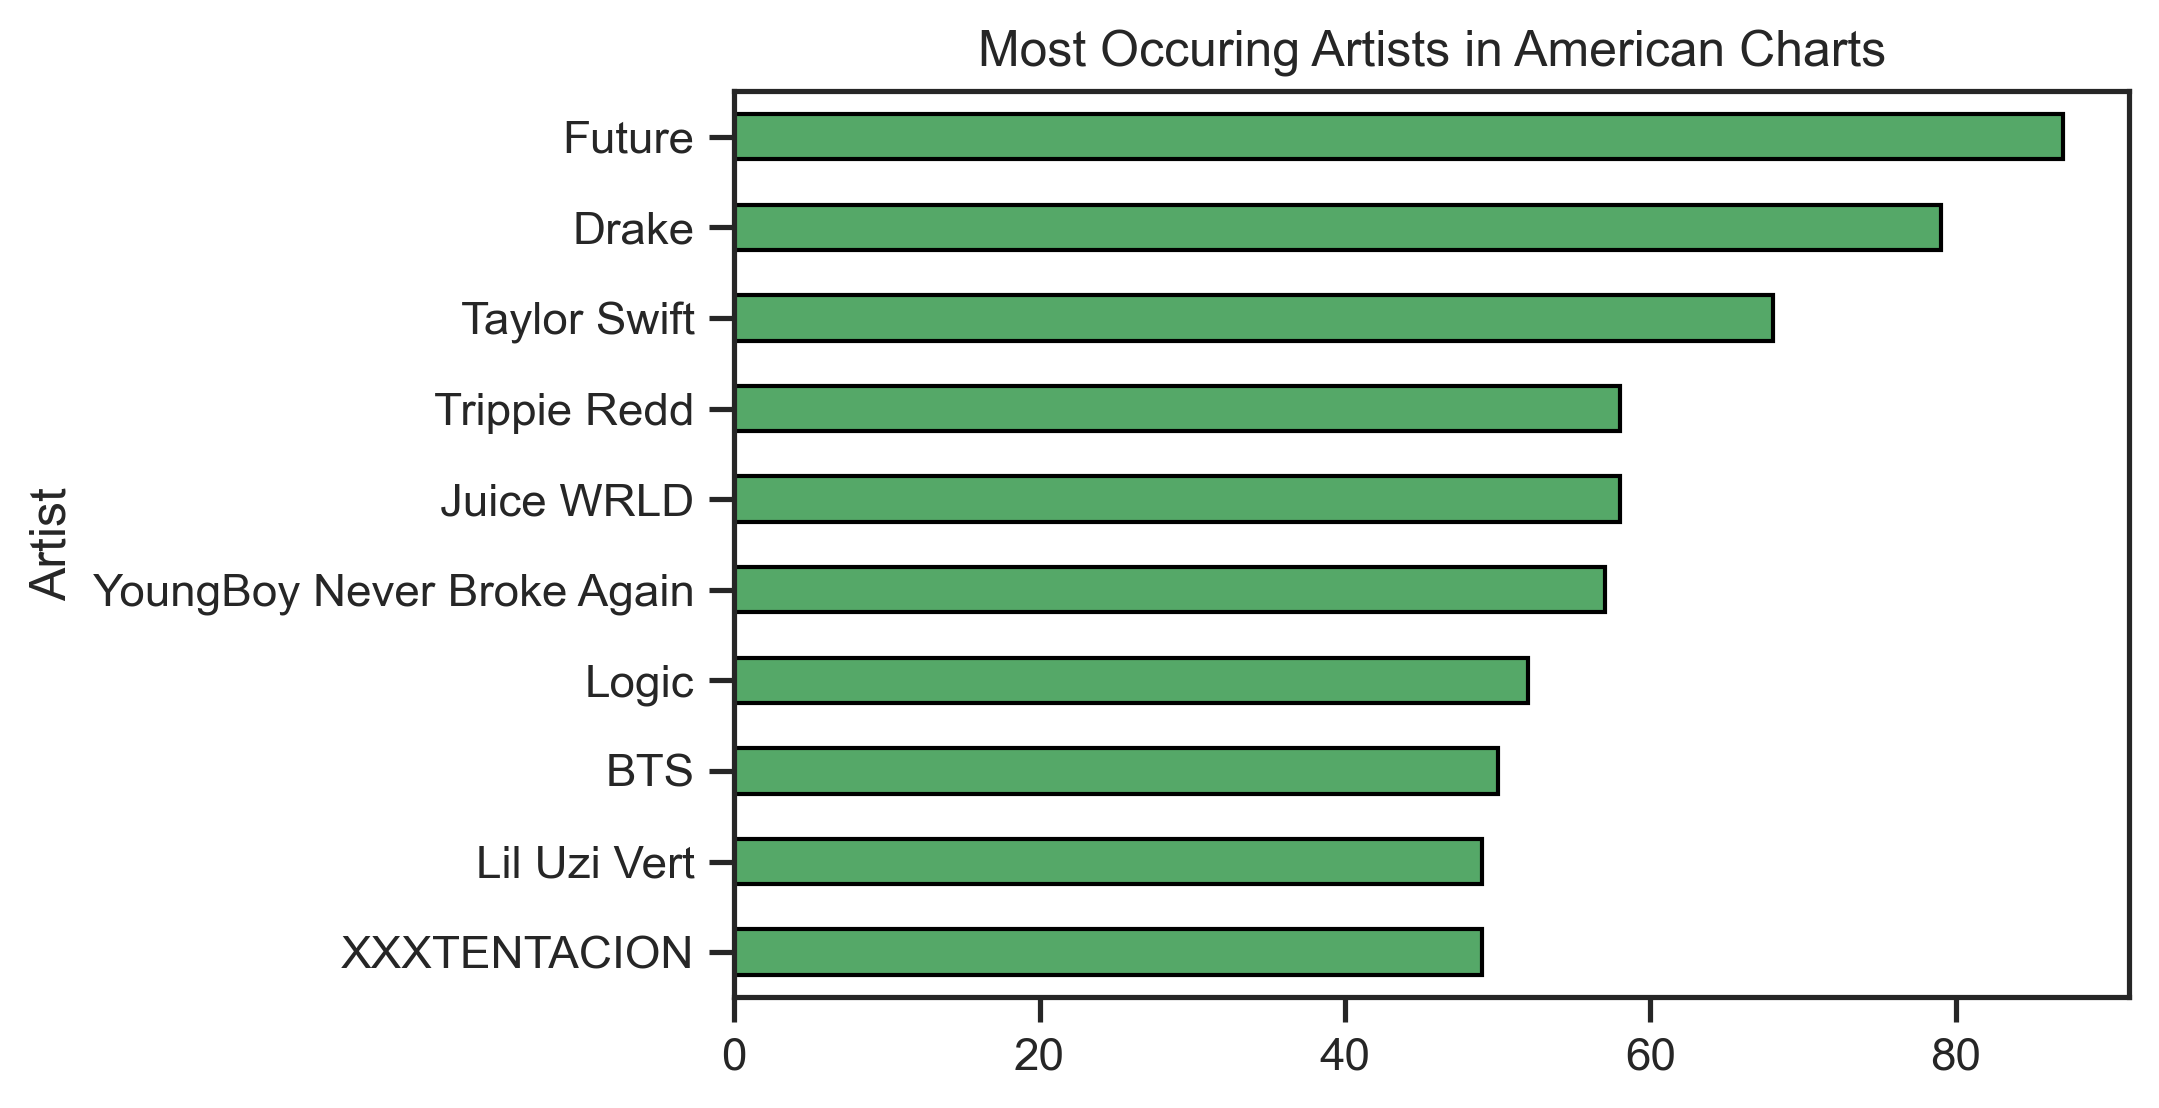

In [25]:
aux_df = usa.groupby('Artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g', edgecolor='black',title='Most Occuring Artists in American Charts')

### Global

In [26]:
global_ = test_df[test_df['Country']=='Global']
global_['artist_popularity'] = global_.groupby('Artist')['Popularity'].transform('sum')
global_['artist_popularity'] = (global_['artist_popularity']-global_['artist_popularity'].min())/(global_['artist_popularity'].max()-global_['artist_popularity'].min())

artist_popularity_global = global_[['Artist','artist_popularity']].drop_duplicates()
artist_popularity_global.sort_values('artist_popularity', ascending=False).head(10)

,Artist,artist_popularity
6245,Ed Sheeran,1.000000
6399,Billie Eilish,0.763699
1863,Post Malone,0.762985
117,Drake,0.757352
771,Ariana Grande,0.718058
682,XXXTENTACION,0.708867
1160,Travis Scott,0.560846
344,Dua Lipa,0.513060
1059,The Weeknd,0.419197
1271,Juice WRLD,0.343683


<AxesSubplot:title={'center':'Most Occuring Artists in Global Charts'}, ylabel='Artist'>

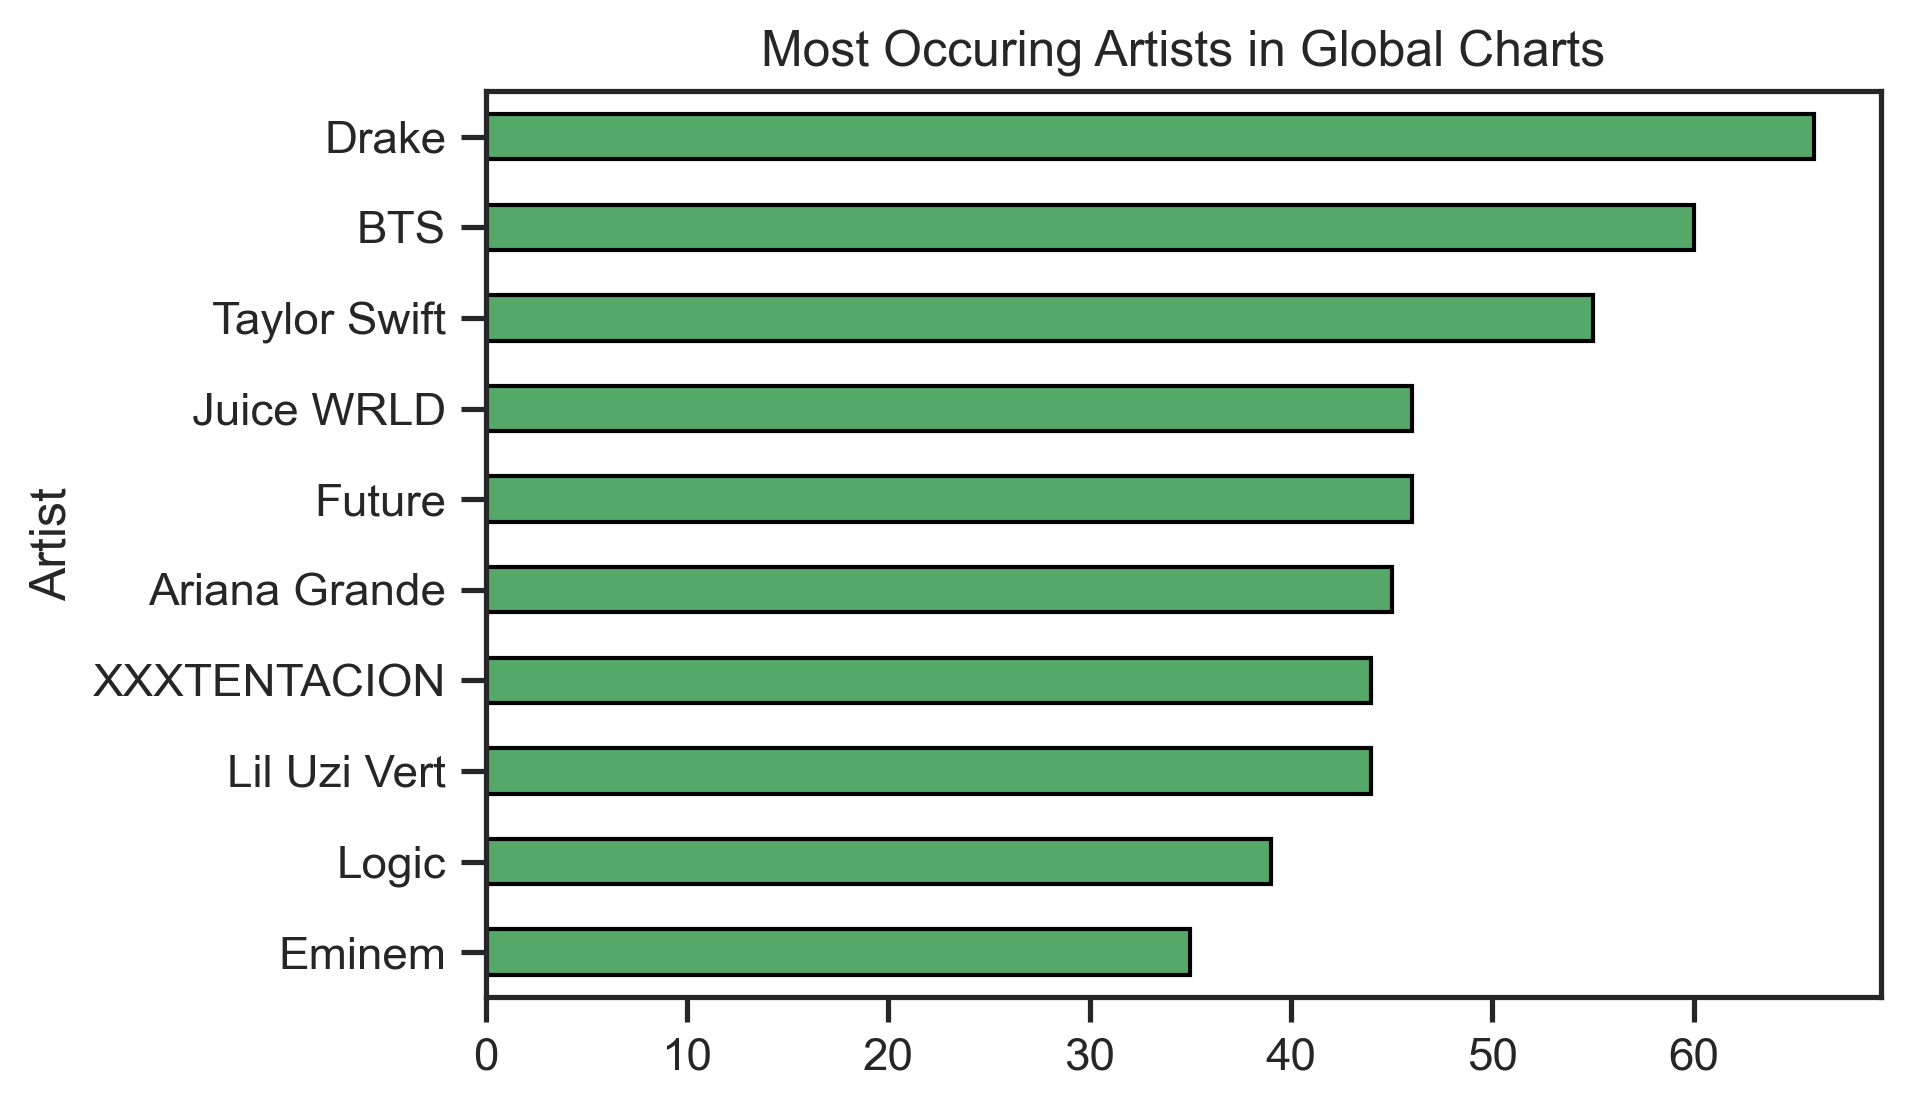

In [27]:
aux_df = global_.groupby('Artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g', edgecolor='black',title='Most Occuring Artists in Global Charts')

## Popularity by Artist Followers
Result: We don't get anything from this

WARNING: This might be useless code but I still wanted to include it

In [28]:
artist_followers = df[['Artist','Artist_followers']].drop_duplicates()

artist_followers=artist_followers.replace('n-a','0')

artist_followers = artist_followers.astype({'Artist_followers':'float'})

In [29]:
artist_followers.sort_values(by=['Artist_followers'],ascending=False, inplace=True)

In [30]:
artist_followers.head(10)

,Artist,Artist_followers
73048,Ed Sheeran - Young Thug - J Hus,71783101.0
6245,Ed Sheeran,71783101.0
93076,Ed Sheeran - Lennox - Zion,71783101.0
13446,Ed Sheeran - Yebba,71783101.0
38010,Ed Sheeran - Eminem - 50 Cent,71783101.0
74740,Ed Sheeran - Travis Scott,71783101.0
155003,Ed Sheeran - Mike Perry,71783101.0
163873,Ed Sheeran - Khalid - NOTD,71783101.0
72403,Ed Sheeran - Ella Mai,71783101.0
135308,Ed Sheeran - Kasbo,71783101.0
